In [2]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

df = pd.read_excel('Questionnaire.xlsx', sheet_name='Scores')
participants = 5

In [3]:
dfA = df.loc[df['Test type'] == 'A']
dfB = df.loc[df['Test type'] == 'B']
dfC = df.loc[df['Test type'] == 'C']
dfD = df.loc[df['Test type'] == 'D']

In [4]:
class HRIdata():
    def __init__(self, df, participants):
        self.df = df
        self.participants = participants

        self.general = ((self.df.iloc[:,1].sum() + self.df.iloc[:,2].sum() 
            + self.df.iloc[:,3].sum() + self.df.iloc[:,4].sum() + self.df.iloc[:,5].sum())/(self.participants*5))

        self.comfort = ((self.df.iloc[:,9].sum() + self.df.iloc[:,10].sum() 
            + self.df.iloc[:,11].sum() + self.df.iloc[:,12].sum())/(self.participants*4))

        self.trust = ((self.df.iloc[:,13].sum() + self.df.iloc[:,14].sum() 
            + self.df.iloc[:,15].sum() + self.df.iloc[:,16].sum() + self.df.iloc[:,21].sum())/(self.participants*5))

        self.safety = ((self.df.iloc[:,17].sum() + self.df.iloc[:,18].sum() 
            + self.df.iloc[:,19].sum() + self.df.iloc[:,20].sum())/(self.participants*4))

        general = [1, 2, 3, 4, 5]
        self.Gq = []
        self.Gscat = []
        for i in general:
            self.Gq.append(self.df.iloc[:,i].sum()/self.participants)
            scat = []
            for j in range(self.participants):
                scat.append(self.df.iloc[j,i])
            
            self.Gscat.append(scat)

        comfort = [9, 10, 11, 12]
        self.Cq = []
        for i in comfort:
            self.Cq.append(self.df.iloc[:,i].sum()/self.participants)

        trust = [13, 14, 15, 16, 21]
        self.Tq = []
        for i in trust:
            self.Tq.append(self.df.iloc[:,i].sum()/self.participants)

        safety = [17, 18, 19, 20]
        self.Sq = []
        for i in safety:
            self.Sq.append(self.df.iloc[:,i].sum()/self.participants)
    
    

In [5]:
testA = HRIdata(dfA, 5)
testB = HRIdata(dfB, 5)
testC = HRIdata(dfC, 5)
testD = HRIdata(dfD, 5)

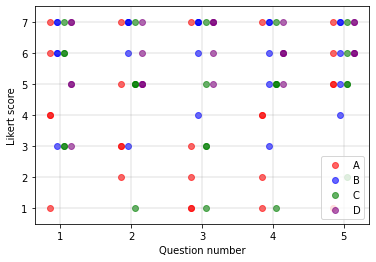

In [6]:
#Scatter plot testing

labels1 = [1,2,3,4,5]
labels = []
for i in labels1:
    labels.append([i,i,i,i,i])
#labels = [[1, 1, 1, 1, 1],[2,2,2,2,2],[3,3,3,3,3],[4,4,4,4,4],[5,5,5,5,5]]

labelsA = []
for list in labels:
    values = [x - 0.15 for x in list]
    labelsA.append(values)

labelsB = []
for list in labels:
    values = [x - 0.05 for x in list]
    labelsB.append(values)

labelsC = []
for list in labels:
    values = [x + 0.05 for x in list]
    labelsC.append(values)

labelsD = []
for list in labels:
    values = [x + 0.15 for x in list]
    labelsD.append(values)

# labelsA = [[1-0.3, 1-0.3, 1-0.3, 1-0.3, 1-0.3],[2-0.3,2-0.3,2-0.3,2-0.3,2-0.3],[3-0.3,3-0.3,3-0.3,3-0.3,3-0.3],[4-0.3,4-0.3,4-0.3,4-0.3,4-0.3],[5-0.3,5-0.3,5-0.3,5-0.3,5-0.3]]

plt.scatter(labelsA, testA.Gscat, color = 'red', alpha=0.6, label = 'A')
plt.scatter(labelsB, testB.Gscat, color = 'blue', alpha=0.6, label = 'B')
plt.scatter(labelsC, testC.Gscat, color = 'green', alpha=0.6, label = 'C')
plt.scatter(labelsD, testD.Gscat, color = 'purple', alpha=0.6, label = 'D')

plt.ylabel("Likert score")
plt.xlabel("Question number")
plt.grid(color='gray', linestyle='-', linewidth=.25)
plt.ylim((0.5,7.5))
plt.legend(loc="lower right")
plt.savefig('ScatTest.png', dpi=200)

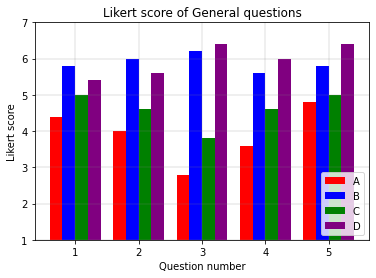

In [7]:
# General graph

width = 0.3
labels = ['1', '2', '3', '4', '5']
x_axis = np.arange(len(labels))

dataA = testA.Gq
dataB = testB.Gq
dataC = testC.Gq
dataD = testD.Gq

plt.figure()
plt.title('Likert score of General questions') 

plt.bar(x_axis - 0.3, dataA, color='red', width=0.2, label = 'A')
plt.bar(x_axis - 0.1, dataB, color='blue', width=0.2, label = 'B')
plt.bar(x_axis + 0.1, dataC, color='green', width=0.2, label = 'C')
plt.bar(x_axis + 0.3, dataD, color='purple', width=0.2, label = 'D')

plt.xticks(x_axis, labels)
plt.ylabel("Likert score")
plt.xlabel("Question number")
plt.grid(color='gray', linestyle='-', linewidth=.25)
plt.ylim((1,7))
plt.legend(loc="lower right")
plt.savefig('Generalscore.png', dpi=200)

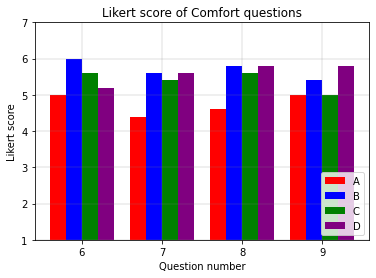

In [8]:
# Comfort graph

labels = ['6', '7', '8', '9']
x_axis = np.arange(len(labels))

dataA = testA.Cq
dataB = testB.Cq
dataC = testC.Cq
dataD = testD.Cq

plt.figure()
plt.title('Likert score of Comfort questions') 

plt.bar(x_axis - 0.3, dataA, color='red', width=0.2, label = 'A')
plt.bar(x_axis - 0.1, dataB, color='blue', width=0.2, label = 'B')
plt.bar(x_axis + 0.1, dataC, color='green', width=0.2, label = 'C')
plt.bar(x_axis + 0.3, dataD, color='purple', width=0.2, label = 'D')

plt.xticks(x_axis, labels)
plt.ylabel("Likert score")
plt.xlabel("Question number")
plt.grid(color='gray', linestyle='-', linewidth=.25)
plt.ylim((1,7))
plt.legend(loc="lower right")
plt.savefig('Comfortscore.png', dpi=200)

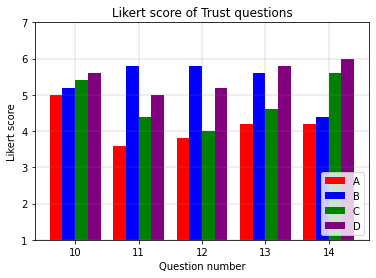

In [9]:
# Trust graph

labels = ['10', '11', '12', '13', '14']
x_axis = np.arange(len(labels))

dataA = testA.Tq
dataB = testB.Tq
dataC = testC.Tq
dataD = testD.Tq

plt.figure()
plt.title('Likert score of Trust questions') 

plt.bar(x_axis - 0.3, dataA, color='red', width=0.2, label = 'A')
plt.bar(x_axis - 0.1, dataB, color='blue', width=0.2, label = 'B')
plt.bar(x_axis + 0.1, dataC, color='green', width=0.2, label = 'C')
plt.bar(x_axis + 0.3, dataD, color='purple', width=0.2, label = 'D')

plt.xticks(x_axis, labels)
plt.ylabel("Likert score")
plt.xlabel("Question number")
plt.grid(color='gray', linestyle='-', linewidth=.25)
plt.ylim((1,7))
plt.legend(loc="lower right")
plt.savefig('Trustscore.png', dpi=200)

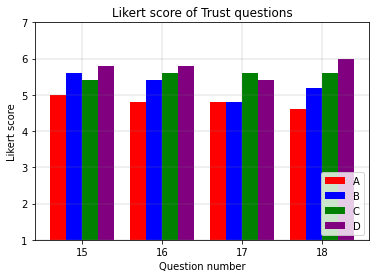

In [10]:
# Safety graph

labels = ['15', '16', '17', '18']
x_axis = np.arange(len(labels))

dataA = testA.Sq
dataB = testB.Sq
dataC = testC.Sq
dataD = testD.Sq

plt.figure()
plt.title('Likert score of Trust questions') 

plt.bar(x_axis - 0.3, dataA, color='red', width=0.2, label = 'A')
plt.bar(x_axis - 0.1, dataB, color='blue', width=0.2, label = 'B')
plt.bar(x_axis + 0.1, dataC, color='green', width=0.2, label = 'C')
plt.bar(x_axis + 0.3, dataD, color='purple', width=0.2, label = 'D')

plt.xticks(x_axis, labels)
plt.ylabel("Likert score")
plt.xlabel("Question number")
plt.grid(color='gray', linestyle='-', linewidth=.25)
plt.ylim((1,7))
plt.legend(loc="lower right")
plt.savefig('Safetyscore.png', dpi=200)

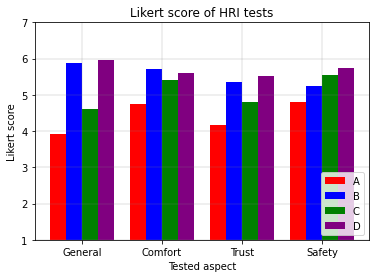

In [11]:
# Overall scores
labels = ['General', 'Comfort', 'Trust', 'Safety']
x_axis = np.arange(len(labels))

dataA = [testA.general, testA.comfort, testA.trust, testA.safety]
dataB = [testB.general, testB.comfort, testB.trust, testB.safety]
dataC = [testC.general, testC.comfort, testC.trust, testC.safety]
dataD = [testD.general, testD.comfort, testD.trust, testD.safety]

plt.figure()
plt.title('Likert score of HRI tests') 

plt.bar(x_axis - 0.3, dataA, color='red', width=0.2, label = 'A')
plt.bar(x_axis - 0.1, dataB, color='blue', width=0.2, label = 'B')
plt.bar(x_axis + 0.1, dataC, color='green', width=0.2, label = 'C')
plt.bar(x_axis + 0.3, dataD, color='purple', width=0.2, label = 'D')

plt.xticks(x_axis, labels)
plt.ylabel("Likert score")
plt.xlabel("Tested aspect")
plt.grid(color='gray', linestyle='-', linewidth=.25)
plt.ylim((1,7))
plt.legend(loc="lower right")
plt.savefig('HRIScore.png', dpi=200)